## Tasks of the Assignment

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

## Dataset
TMNIST: A database of Typeface based digits

This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.

The dataset consists of a single file:

TMNIST_Data.csv
This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

Kaggle Link: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

### Installing all required libararies
1. numpy 
2. tensorflow
3. keras

In [19]:
!pip install numpy
!pip install tensorflow
!pip install keras

### Importing all necessary libraries

In [20]:
from keras.datasets import mnist
# from keras.utils import to_categorical
import numpy as np
# from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
# from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras import layers
from keras import models
import tensorflow 

In [21]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

To ensure that the model is reproducable, a random see is set.

In [22]:
np.random.seed(99)
profile_load_path = '../input/tmnist-typeface-mnist/TMNIST_Data.csv' # file path

dataSet=pd.read_csv(profile_load_path)
list_=dataSet.values.tolist()

data = []
x = []
y = []
train_data = []
train_label = []
test_data = []
test_label = []

The experimental 
The experimental data is divided into training set and test set according to the ratio of 4:1, and ensure that the model is reproducible.

In [23]:
for i in range(len(list_)):
    label = list_[i][1]
    a = list_[i][2:]
    a = np.array(a)
    a = a.reshape(28, 28).tolist()
    x.append(a)
    y.append(label)
train_data, test_data, train_label, test_label = train_test_split(x,y,test_size=0.25, random_state=1)

In [24]:
# the length of train and test data
print(len(train_data))
print(len(test_data))
# output the details of the data
# print(train_data[:2])
# print(train_label[:2])

22425
7475


## 2. Data Visualization

Since the dataset provides the gray value of the original image, we only need to label the pixel value of each pixel in the image as shown in the dataset. Here I label the first four images of the training set.

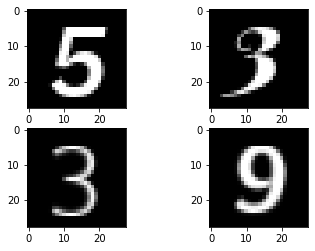

In [25]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(train_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_data[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## 3. Data Preprocessing

In [26]:
# Convert the list to an array type to facilitate subsequent data preprocessing
train_data = np.array(train_data)
test_data = np.array(test_data)
train_label = np.array(train_label)
test_label = np.array(test_label)

Data normalization and binary conversion to improve accuracy and save memory.

In [27]:
train_data = train_data.reshape((22425, 28, 28, 1))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((7475, 28, 28, 1))
test_data = test_data.astype('float32') / 255

# Convert class vector to a binary class matrix
train_label = tensorflow.keras.utils.to_categorical(train_label)
test_label = tensorflow.keras.utils.to_categorical(test_label)
# tf.keras.utils.to_categorical(y_train)

## 4. Build the model

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

The model is a feedforward neural network, which passes the input matrix of (28, 28, 1) through twice convolution and pooling to obtain feature information, outputs a matrix of (5, 5, 64), and then directly flattens the data, After turning it into a one-dimensional array, make it passes through two fully connected layers. The output dimension of the last fully connected layer is 10, corresponding to ten numbers from 0 to 9. The Softmax activation function is used to obtain the label with the highest probability of the corresponding input, and Relu is used as the activation function in each layer of the hidden layer, because it can divide the two-dimensional matrix well, and it is smooth enough, and the amount of calculation is small. This is often the best choice when we are dealing with datasets with distinct features.

## 5. Train and Test

The optimizer of the model adopts RMSProp, and its decay coefficient will make the model make greater progress in the direction of a more gentle parameter space (because it is gentle, the sum of squares of historical gradients is smaller, and the corresponding learning decline is smaller), and it can make the steep direction smooth, thus speeding up the training speed.

The loss function of experimental backpropagation selects the Categorical_crossentropy function, which is often used in single-label multi-classification problems. This statement also applies to the Softmax activation function.

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_label, epochs=5, batch_size=64)

Epoch 1/5
351/351 [==============================] - 8s 21ms/step - loss: 0.2381 - accuracy: 0.9286
Epoch 2/5
351/351 [==============================] - 8s 22ms/step - loss: 0.0586 - accuracy: 0.9830
Epoch 3/5
351/351 [==============================] - 7s 20ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 4/5
351/351 [==============================] - 7s 20ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 5/5
351/351 [==============================] - 7s 20ms/step - loss: 0.0213 - accuracy: 0.9934


In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

Plot images of accuracy and loss during training

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  """


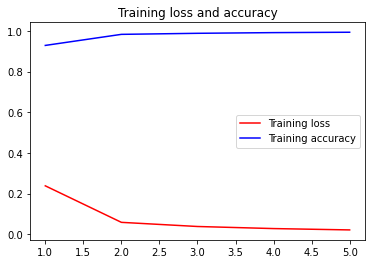

In [31]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='r')
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.legend()
plt.show()

Test the trained model

In [32]:
test_loss, test_acc = model.evaluate(test_data, test_label)

234/234 [==============================] - 1s 5ms/step - loss: 0.0332 - accuracy: 0.9910


In [33]:
print("Model Accuracy Results: ", test_acc)

Model Accuracy Results:  0.9910367727279663


## 6. Conclusion

This experiment was very successful. After 5 rounds of training with 64 sets of data in each step, the accuracy of the model during training reached 0.991, and the test result reached 0.993.

## References


1. (https://www.kaggle.com/code/huchunjun/99-1-tmnist-typefacemnist-chunjunhu)
2. MNIST classification (https://www.tensorflow.org/quantum/tutorials/mnist)
3. Neural Network For Handwritten Digits Classification | Deep Learning Tutorial 7 (Tensorflow2.0) (https://www.youtube.com/watch?v=iqQgED9vV7k)

## Licences

1. Tensorflow -- Apache License 2.0 (https://www.tensorflow.org/responsible_ai/model_card_toolkit/api_docs/python/model_card_toolkit/License?hl=fi-fi)
2. Keras -- https://github.com/keras-team/keras/blob/master/LICENSE
3. Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html